In [73]:
import numpy as np
import pandas as pd
from scipy.stats import binom
from urllib.request import urlopen
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

pd.set_option("display.max_columns", 500)

In [74]:
G = nx.read_graphml(urlopen("https://raw.githubusercontent.com/timathom/netsci/master/project/data/full/full.graphml"))
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 13105
Number of edges: 24780
Average in degree:   1.8909
Average out degree:   1.8909


In [77]:
# Add network nodes to a list
graph = [G.node[n] for n in G.nodes_iter()]

# Create DataFrame from list
df = pd.DataFrame(graph)
df.fillna(0, inplace=True)
ego_net = df[df.loc[:, "ego"] == True]
dedicators = df[df.loc[:, "dedicator"] == True]

dedicators

,Clustering Coefficient,Component ID,Degree,Eigenvector Centrality,In-Degree,Modularity Class,Out-Degree,Strongly-Connected ID,b,dedicator,ego,g,label,lang-af,lang-als,lang-an,lang-ar,lang-arz,lang-ast,lang-ay,lang-az,lang-ba,lang-be,lang-be-tarask,lang-bg,lang-bn,lang-br,lang-bs,lang-ca,lang-ce,lang-ckb,lang-co,lang-cs,lang-cy,lang-da,lang-de,lang-el,lang-en,lang-eo,lang-es,lang-et,lang-eu,lang-fa,lang-fi,lang-fo,lang-fr,lang-fy,lang-ga,lang-gd,lang-gl,lang-gv,lang-he,lang-hi,lang-hif,lang-hr,lang-hu,lang-hy,lang-ia,lang-id,lang-ilo,lang-io,lang-is,lang-it,lang-ja,lang-jv,lang-ka,lang-kk,lang-kn,lang-ko,lang-ksh,lang-ku,lang-la,lang-lb,lang-li,lang-lmo,lang-lt,lang-lv,lang-mk,lang-ml,lang-mn,lang-mr,lang-ms,lang-mwl,lang-my,lang-nap,lang-nds,lang-nl,lang-nn,lang-no,lang-nrm,lang-oc,lang-or,lang-os,lang-pa,lang-pcd,lang-pl,lang-pnb,lang-pt,lang-qu,lang-ro,lang-ru,lang-rue,lang-sa,lang-sc,lang-scn,lang-sco,lang-sh,lang-simple,lang-sk,lang-sl,lang-so,lang-sq,lang-sr,lang-sv,lang-sw,lang-ta,lang-te,lang-th,lang-tl,lang-tr,lang-tt,lang-uk,lang-ur,lang-uz,lang-vec,lang-vi,lang-vls,lang-vo,lang-war,lang-wuu,lang-xmf,lang-yi,lang-yo,lang-zh,lang-zh-min-nan,lang-zh-yue,lang-zu,r,size,wiki degree,x,y
0,0.000000,0,10,0.000471,1,1,9,10680,255,1,1,196,Richard A. Macksey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000471,1,0.236283,0.468625
3,0.071429,0,294,0.356235,121,1,173,10680,255,1,1,196,Roland Barthes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.356235,53,0.361828,0.351351
5,0.000000,1,3,0.000000,0,0,3,10684,0,1,0,0,Ernst Behler,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,1,0.145997,0.758153
11,0.000000,0,13,0.007751,3,0,10,10680,0,1,0,0,Alain Suied,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.007751,2,0.282101,0.541904
14,0.000000,0,16,0.004188,2,0,14,10680,0,1,0,0,M. H. Abrams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

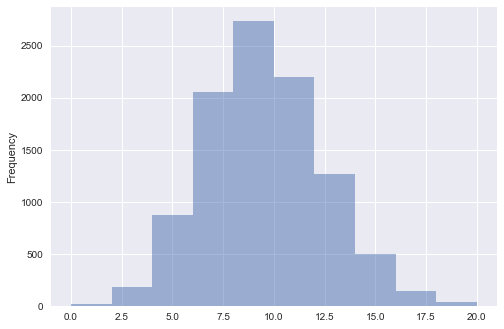

In [82]:
# Define simulation function to randomly assign dedicator labels
def simulate(dfs, dist):
   
    dtest = dfs["dedicator"] == 1       
    dedicators = dfs[dtest].copy()           
    dedicators["dedicator"] = np.random.choice(dfs.index, len(dedicators))    
    d = dfs.iloc[dedicators["dedicator"]]    
    etest = d["ego"] == 1
    dist["ego"].append(len(d[etest]))
    
simulation = df.copy()

# Initialize a dictionary to hold the results
distribution = {"ego": []}

# Run the simulation
for i in range(10000):
    simulate(simulation, distribution)

result = distribution
dfr = pd.DataFrame(result)

# Plot the result
plt.figure();
dfr.loc[:, "ego"].plot.hist(alpha = 0.5)

plt.show()


In [91]:
# Print summary data

percent_total = len(dedicators)/len(df)
percent_ego = len(ego_net[ego_net.loc[:, "dedicator"] == True])/len(ego_net)


summary = pd.DataFrame.from_dict({"Total dedicators": [len(dedicators)],
    "Nodes in ego network": [len(ego_net)],
    "Dedicators in ego network": [len(ego_net[ego_net.loc[:, "dedicator"] == True])],
    "Proportion of dedicators (total)": [percent_total],
    "Proportion of dedicators (ego)": [percent_ego],
    "Mean dedicators in ego network under null model": [np.mean(dfr.loc[:, "ego"])]
})

summary

,Dedicators in ego network,Mean dedicators in ego network under null model,Nodes in ego network,Proportion of dedicators (ego),Proportion of dedicators (total),Total dedicators
0,47,9.0265,740,0.063514,0.012209,160


In [68]:
# Likelihood of seeing a number greater than or equal to 47 in a set of 740 nodes with a probability of 0.01.
round(1 - binom.cdf(46, 740, 0.01), 4)

0.0